## Introducción
La industria de los videojuegos es un sector amplio y en constante crecimiento, impulsado por avances tecnológicos que han hecho que los videojuegos sean cada vez más accesibles. En este proyecto, se analizaron las ventas de videojuegos desde 1980 hasta 2016, centrándose en las cifras de ventas, las plataformas, los géneros y las regiones. El objetivo fue identificar patrones y obtener información clave para comprender qué juegos tienen éxito, qué plataformas son las más populares y cuáles son los productores que dominan el mercado. Además, se examinó cómo estas variables varían según las regiones, incluyendo Norteamérica, Europa, Japón y el resto del mundo. Los conocimientos adquiridos en este análisis aportan una comprensión más profunda sobre los factores que contribuyen al éxito de los videojuegos en esta industria.

### Validación de Datos

El conjunto de datos inicial contenía 16,598 filas y 11 columnas antes de los procesos de limpieza y validación. A continuación, se detalla la información de las variables incluidas:
1. Rank: Clasificación basada en las ventas globales. Sin valores faltantes (el mismo juego en diferentes plataformas se cuenta como valores distintos).
2. Name: Nombre del videojuego. Sin valores faltantes.
3. Platform: Plataforma en la que se lanzó el juego (ej. PC, PS4, etc.). Sin valores faltantes.
4. Year: Año de lanzamiento del juego. 271 valores faltantes, que se eliminaron durante el proceso de limpieza.
5. Genre: Género del juego. Sin valores faltantes.
6. Publisher: Editor del juego. 58 valores faltantes, eliminados en el proceso de limpieza.
7. NA_Sales: Ventas en Norteamérica (en millones). Sin valores faltantes.
8. EU_Sales: Ventas en Europa (en millones). Sin valores faltantes.
9. JP_Sales: Ventas en Japón (en millones). Sin valores faltantes.
10. Other_Sales: Ventas en el resto del mundo (en millones). Sin valores faltantes.
11. Global_Sales: Ventas totales a nivel mundial. Sin valores faltantes.

## Carga de Librerías

In [1]:
import numpy as np # Simplifica el manejo de arreglos y matrices
import pandas as pd # Analizar, transformar y manipular información fácilmente
import matplotlib.pyplot as plt # Crear gráficos y visualizaciones
import seaborn as sns # Gráficos atractivos y fáciles de interpretar
from IPython.display import Image # Mostrar imágenes en Jupyter Notebook

In [2]:
# Import os lo utilizo para interactuar con el sistema manejando rutas de archivos y directorios.
import os
for dirname, _, filenames in os.walk('/Kaggle-Video_game_sales/Datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Kaggle-Video_game_sales/Datasets\vgsales.csv


In [3]:
### Cargamos el dataset ###
df = pd.read_csv("/Kaggle-Video_game_sales/Datasets/vgsales.csv")

## Interactuamos con el DataSet

In [16]:
df.head() # Muestra las primeras 5 filas del DataFrame

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [17]:
df.tail() # Muestra las últimas 5 filas del DataFrame

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [18]:
df.info() # Información general del DataFrame, incluyendo tipos de datos y valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [19]:
df.columns # Muestra los nombres de las columnas del DataFrame

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [20]:
df.shape # Muestra la forma del DataFrame (filas, columnas)

(16598, 11)

In [21]:
df.describe().T # Estadísticas descriptivas de las columnas numéricas del DataFrame

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


In [18]:
# Import os lo utilizo para interactuar con el sistema manejando rutas de archivos y directorios.
import os
for dirname, _, filenames in os.walk('/Kaggle-Video_game_sales/Imagenes-gif'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Kaggle-Video_game_sales/Imagenes-gif\detectar.gif
/Kaggle-Video_game_sales/Imagenes-gif\detectar1.gif
/Kaggle-Video_game_sales/Imagenes-gif\giff.gif
/Kaggle-Video_game_sales/Imagenes-gif\Missing Episode 9 GIF by The Simpsons.gif


### Detección de valores faltanes y rellenamos

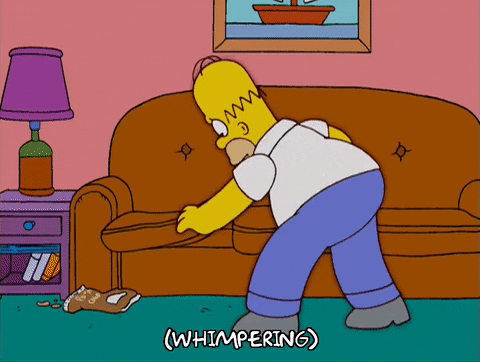

In [30]:
Image(filename="/Kaggle-Video_game_sales/Imagenes-gif/Missing Episode 9 GIF by The Simpsons.gif")

aaa